### Auto Regression

Apply regression algorithm to find the next T value using t-1, t-2 ... t-n values which are also called lags

### ARIMAX

##### 1. Check the data if its stationary
using Dickey Fuller test
H0 => Unit root = 1 => Data is not stationary
H1 => Unit root < 1 => Data is stationary

for stationry data the mean amd Standard deviation should be constant

To convert non stationary data to stationary data
we do differencing Shift values by 1 and get the difference btw the previous and current value

In [58]:
import numpy as numpy
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [59]:
df = pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [60]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [61]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [62]:
df.dropna(axis=0, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [64]:
df['Month'] = pd.to_datetime(df['Month'])

In [65]:
df.set_index('Month', inplace=True)

In [66]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

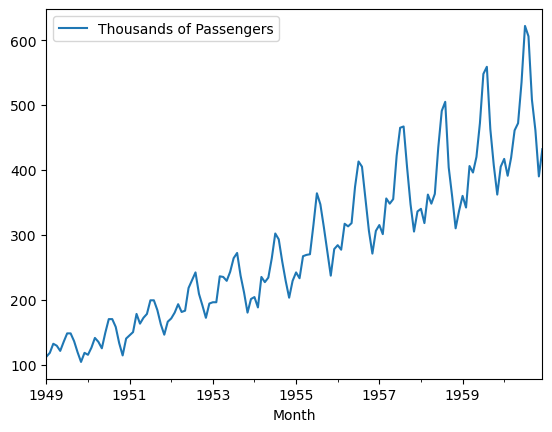

In [67]:
df.plot()

In [68]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF statistics: {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesus, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, times series has a unit root, indecating it is not stationary")

In [69]:
adf_test(df['Thousands of Passengers'])

ADF statistics: 0.8153688792060482
p-value : 0.991880243437641
weak evidence against null hypothesis, times series has a unit root, indecating it is not stationary


In [70]:
## use techniques differencing
df['Passengers First Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)
df.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [71]:
adf_test(df['Passengers First Difference'].dropna())

ADF statistics: -2.8292668241699994
p-value : 0.0542132902838255
weak evidence against null hypothesis, times series has a unit root, indecating it is not stationary


In [72]:
df['Passengers Second Difference'] = df['Passengers First Difference'] - df['Passengers First Difference'].shift(1)
df.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [73]:
adf_test(df['Passengers Second Difference'].dropna())

ADF statistics: -16.384231542468505
p-value : 2.7328918500142407e-29
Strong evidence against the null hypothesus, reject the null hypothesis. Data has no unit root and is stationary


For seasonal data we can have to do for 12 months

In [74]:
df['Passengers 12 Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)
df.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [75]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF statistics: -3.383020726492481
p-value : 0.011551493085514954
Strong evidence against the null hypothesus, reject the null hypothesis. Data has no unit root and is stationary


In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

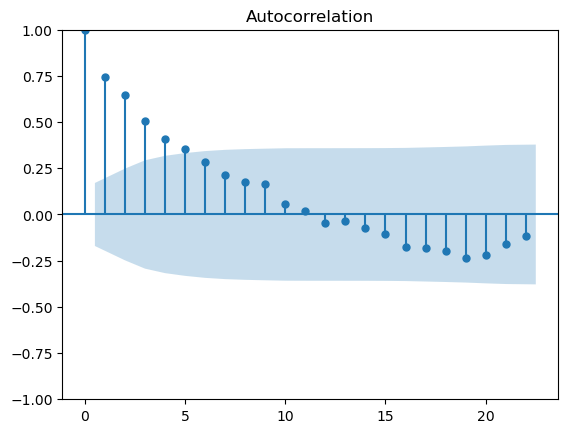

In [77]:
acf = plot_acf(df['Passengers 12 Difference'].dropna())

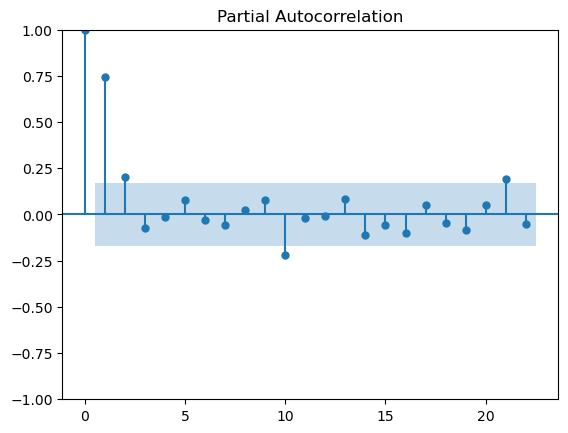

In [78]:
result = plot_pacf(df['Passengers 12 Difference'].dropna())

In [79]:
df

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [80]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [81]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days=1): test_dataset_end]

In [82]:
##prediction

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [83]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [84]:
#Create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [85]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [ ]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(14,2,2  ))

c:\Users\108207\AppData\Local\anaconda3\envs\mleng\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\108207\AppData\Local\anaconda3\envs\mleng\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\108207\AppData\Local\anaconda3\envs\mleng\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [87]:
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\108207\AppData\Local\anaconda3\envs\mleng\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\108207\AppData\Local\anaconda3\envs\mleng\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\108207\AppData\Local\anaconda3\envs\mleng\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(14, 2, 2)   Log Likelihood                -305.585
Date:                     Thu, 05 Feb 2026   AIC                            645.170
Time:                             15:50:42   BIC                            686.085
Sample:                         01-01-1949   HQIC                           661.597
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9487      0.309     -3.072      0.002      -1.554      -0.343
ar.L2         -0.2750      0.289     -0.953      0.341      -0.841       0.291
ar.L3         -0.3211      0.276     -1.162      0.245      -0.863       0.221
ar.L4         -0.3296      0.297     -1.110      0.267      -0.912       0.252
ar.L5         -0.2703      0.293     -0.921      0.357      -0.845       0.305
ar.L6         -0.3030      0.288     -1.053      0.292      -0.867       0.261
ar.L7         -0.2852      0.304     -0.938      0.348      -0.881       0.311
ar.L8         -0.4134      0.308     -1.344      0.179      -1.016       0.189
ar.L9         -0.3211      0.328     -0.980      0.327      -0.963       0.321
ar.L10        -0.3238      0.291     -1.114      0.265      -0.893       0.246
ar.L11        -0.2522      0.315     -0.801      0.423      -0.869       0.365
ar.L12         0.5698      0.298      1.914      0.056      -0.014       1.153
ar.L13         0.6040      0.272      2.217      0.027       0.070       1.138
ar.L14        -0.0552      0.220     -0.251      0.802      -0.486       0.375
ma.L1         -0.1862      0.393     -0.473      0.636      -0.957       0.585
ma.L2         -0.8009      0.330     -2.430      0.015      -1.447      -0.155
sigma2        82.5117     22.201      3.717      0.000      38.998     126.026
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 3.21
Prob(Q):                              0.73   Prob(JB):                         0.20
Heteroskedasticity (H):               2.00   Skew:                             0.48
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
##prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [90]:
pred = model_ARIMA_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred

In [91]:
residuals

Month
1956-01-01     -1.261911
1956-02-01      3.090061
1956-03-01     23.247856
1956-04-01     12.028249
1956-05-01     15.873283
1956-06-01     26.561464
1956-07-01     21.761849
1956-08-01     32.402683
1956-09-01     15.303631
1956-10-01      1.929194
1956-11-01     -2.084069
1956-12-01     -1.316929
1957-01-01     -2.704251
1957-02-01      0.984031
1957-03-01     40.096672
1957-04-01     24.338521
1957-05-01     23.986566
1957-06-01     48.682223
1957-07-01     49.204525
1957-08-01     72.358678
1957-09-01     38.902461
1957-10-01     14.314338
1957-11-01     -1.859867
1957-12-01     -0.520312
1958-01-01     -7.130717
1958-02-01     -8.730721
1958-03-01     25.155988
1958-04-01     -0.077377
1958-05-01      5.047264
1958-06-01     34.751001
1958-07-01     52.732833
1958-08-01     87.009759
1958-09-01     15.043179
1958-10-01     -3.391645
1958-11-01    -29.348628
1958-12-01    -29.369906
1959-01-01    -15.264905
1959-02-01    -11.631685
1959-03-01     47.455680
1959-04-01     23.1

<Axes: ylabel='Density'>

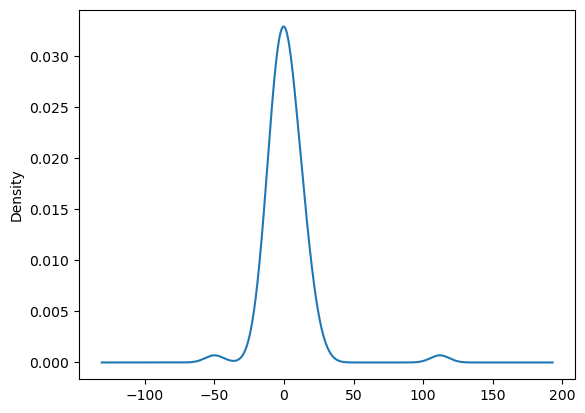

In [92]:
model_ARIMA_fit.resid.plot(kind='kde')

In [93]:
test_data['Predicted_ARIMA'] = pred

C:\Users\108207\AppData\Local\Temp\ipykernel_39644\284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


<Axes: xlabel='Month'>

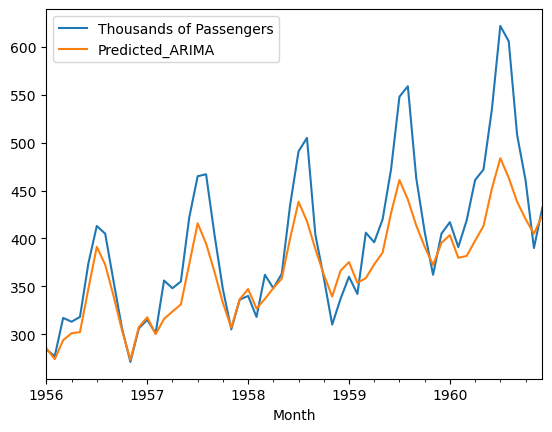

In [94]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()